In [ ]:
!pip install yfinance 
import yfinance as yf

In [2]:
data = yf.download("VALE3.SA", start="2022-01-01", end="2022-06-06")
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,79.000000,79.970001,78.000000,78.000000,75.112267,18557200
2022-01-04,78.510002,79.070000,76.900002,77.080002,74.226326,18178700
2022-01-05,77.370003,78.680000,77.129997,77.809998,74.929298,22039000
2022-01-06,78.639999,80.349998,78.309998,79.379997,76.441170,22044100
2022-01-07,80.400002,84.000000,79.790001,84.000000,80.890129,35213100
...,...,...,...,...,...,...
2022-05-30,86.279999,87.410004,86.010002,86.650002,86.650002,16147900
2022-05-31,87.220001,87.430000,85.010002,86.209999,86.209999,41369800
2022-06-01,86.190002,88.779999,86.000000,88.239998,88.239998,26258900


In [47]:
closes = data['Close']
import pandas as pd
closes = pd.DataFrame()
closes['close'] = data['Close']
closes['mean_5'] = data['Close'].rolling(5).mean()
closes['mean_10'] = data['Close'].rolling(10).mean()
closes['mean_15'] = data['Close'].rolling(20).mean()
closes = closes[10::]

In [71]:
closes.describe()

,close,mean_5,mean_10,mean_15
count,96.000000,96.000000,96.000000,87.000000
mean,88.485417,88.403563,88.310240,88.799684
std,6.676246,6.341570,5.957934,5.424326
min,75.540001,77.286000,78.376000,79.925500
25%,83.997501,83.663501,84.063749,84.278500
50%,87.610001,87.192000,87.842501,88.273500
75%,94.217503,94.047499,94.774749,93.767750
max,105.070000,101.370000,97.901000,96.554000


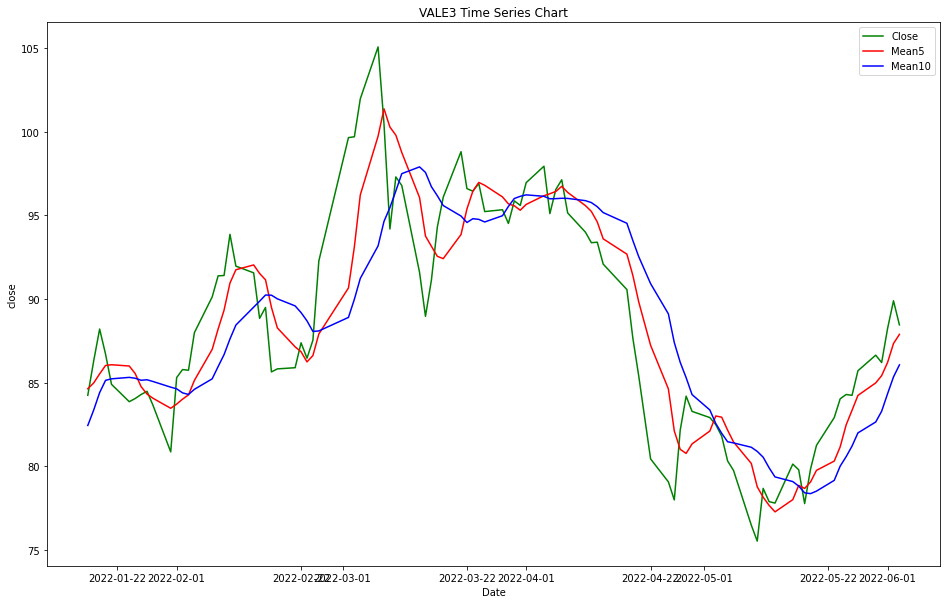

In [70]:
import seaborn as sns
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
figure(figsize=(16, 10))
sns.lineplot(x=closes.index,y=closes['close'],color = 'green').set(title="VALE3 Time Series Chart")
sns.lineplot(x = closes.index, y = closes['mean_5'],color = 'red')
sns.lineplot(x = closes.index, y = closes['mean_10'],color = 'blue')
plt.legend(labels = ['Close','Mean5','Mean10'])

In [78]:
from statsmodels.tsa.api import  Holt

In [93]:
fit1 = Holt(closes['close']).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(12).rename("Holt's linear trend")

fit2 = Holt(closes['close']).fit(smoothing_level=0.7, smoothing_slope=0.5, optimized=False)
fcast1 = fit2.forecast(12).rename("Holt's linear trend")

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


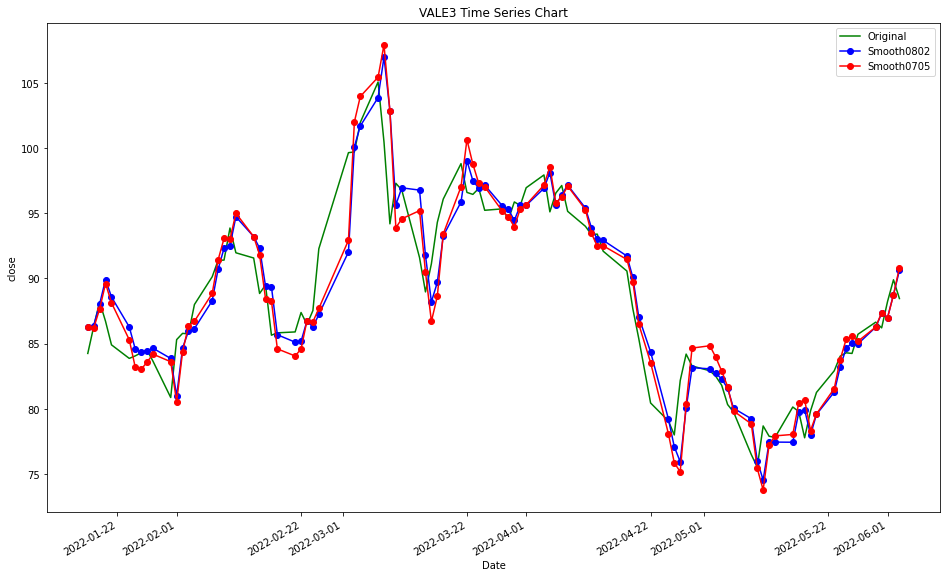

In [96]:
figure(figsize=(16, 10))
sns.lineplot(x=closes.index,y=closes['close'],color = 'green').set(title="VALE3 Time Series Chart")
fit1.fittedvalues.plot(marker="o", color='blue')
fit2.fittedvalues.plot(marker="o", color='red')
plt.legend(labels = ['Original','Smooth0802','Smooth0705'])
plt.show()